In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.shape

(1460, 81)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "Missing values": missing,
    "Missing (%)": missing_percent
})

missing_table.head(15)


,Missing values,Missing (%)
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


In [5]:
selected_features = [
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "GrLivArea",
    "TotalBsmtSF",
    "FullBath",
    "BedroomAbvGr",
    "GarageCars",
    "GarageArea"
]

df_selected = df[selected_features + ["SalePrice"]]
df_selected.head()


,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,TotalBsmtSF,FullBath,BedroomAbvGr,GarageCars,GarageArea,SalePrice
0,8450,7,5,2003,1710,856,2,3,2,548,208500
1,9600,6,8,1976,1262,1262,2,3,2,460,181500
2,11250,7,5,2001,1786,920,2,3,2,608,223500
3,9550,7,5,1915,1717,756,1,3,3,642,140000
4,14260,8,5,2000,2198,1145,2,4,3,836,250000


In [6]:
df_selected.isna().sum()


LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
GrLivArea       0
TotalBsmtSF     0
FullBath        0
BedroomAbvGr    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

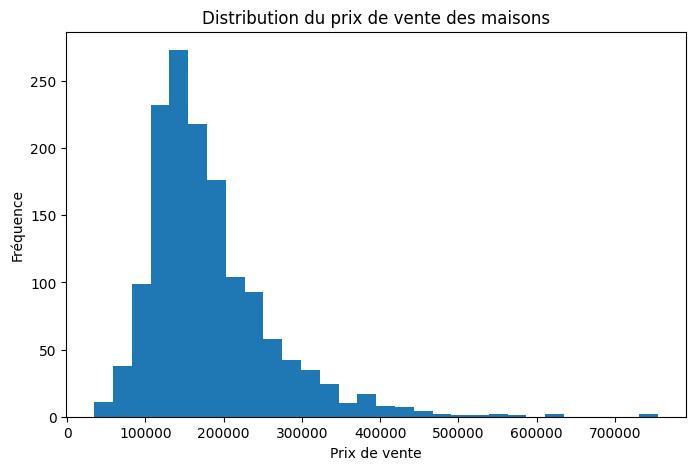

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df_selected["SalePrice"], bins=30)
plt.title("Distribution du prix de vente des maisons")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")
plt.show()


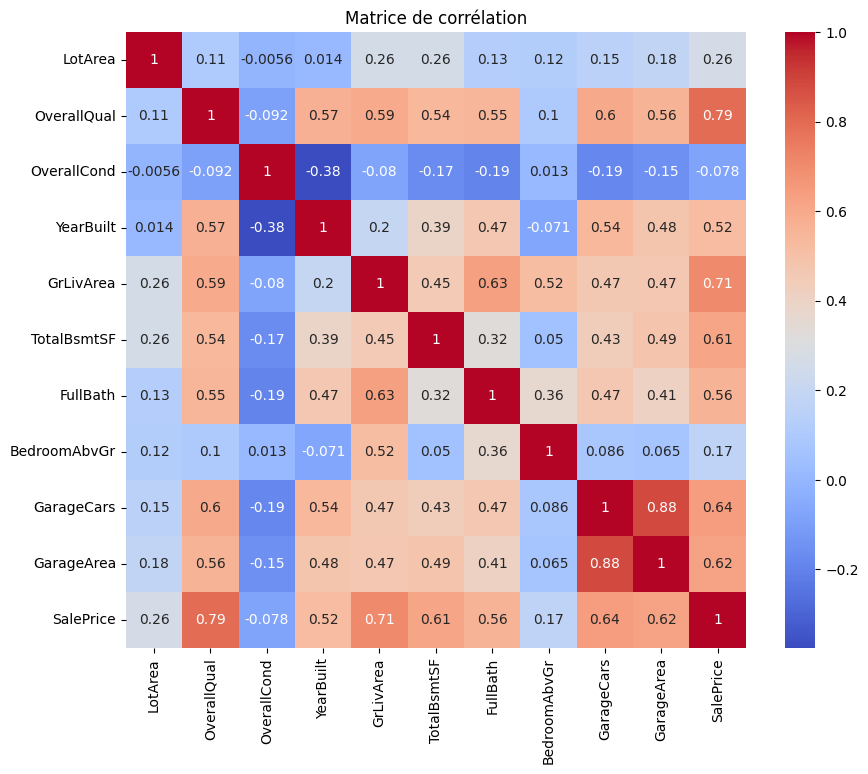

In [8]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_selected[selected_features]
y = df_selected["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rmse, r2


(np.float64(38013.995680822525), 0.811603336209148)